In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy.stats import zscore
# from scipy.stats.mstats import winsorize
from scipy import stats

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

stuper = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()
stuper['total'] = stuper['math score'] + stuper['reading score'] + stuper['writing score']
stuper.columns
stuper.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

I've created a new column called 'total' which is the sum of the math, reading, and writing test scores for each student. With a glance at the visuals, it looks like while there's some difference, it's probably not significant. I'll run t-tests to confirm.

Wow, I bite my tongue - there is definitely a meaningful difference between the average scores of females and males. My next question would be, exactly how significant is this difference? While the p-value is clearly below the 0.05 threshold, it doesn't really matter if the score difference is only a couple of points.

It seems that the t-tests confirm that there is a significant difference between the means of the races/ethnicities that *are not* adjacent to each other in terms of average scores. For example, there is no significant difference between groups A and B or C and D, the two lowest scoring groups and the two middle-scoring groups respectively, but there are significant differences between groups B and E and groups A and C.

Finally, as the difference of parental level of education increases, the significance between the test scores increase. While there isn't a meaningful difference in test scores of students with parents with some college experience vs those with an associate's degree, those with an associate's degree vs those with a bachelor's degree, or those with a bachelor's degree and those with a master's, there is significant difference in the average test scores of students of parents with an associate's degree vs those with a masters as well as parents with some college experience and those with a bachelor's. The only significant difference between adjacent variables is students of parents with high school diplomas and students with parents of some college experience.

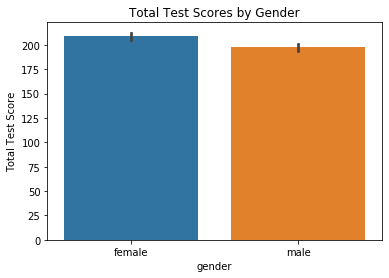

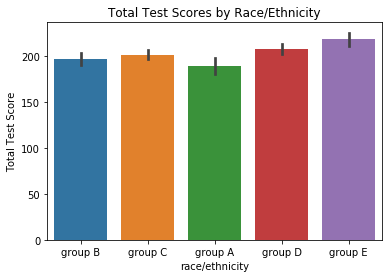

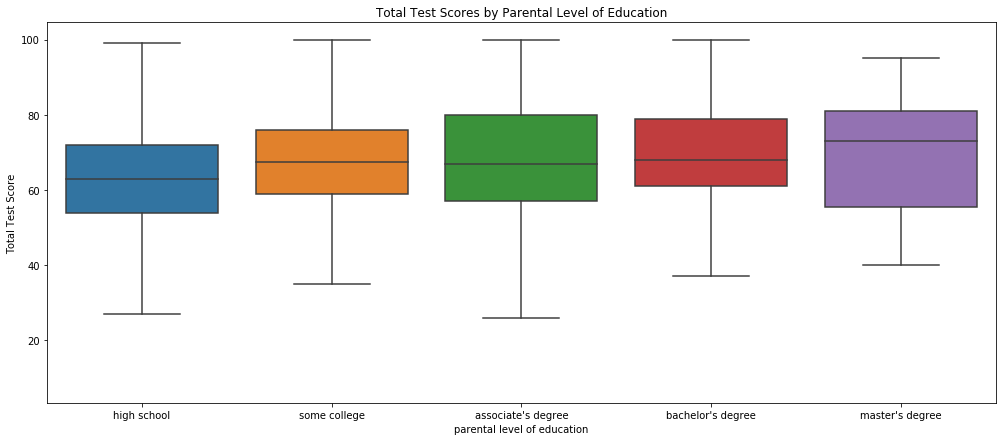

In [3]:
plt.title('Total Test Scores by Gender')
sns.barplot(stuper['gender'], stuper['total'])
plt.ylabel('Total Test Score')
plt.show()

plt.title('Total Test Scores by Race/Ethnicity')
sns.barplot(stuper['race/ethnicity'], stuper['total'])
plt.ylabel('Total Test Score')
plt.show()

plt.figure(figsize=(17,7))
plt.title('Total Test Scores by Parental Level of Education')
sns.boxplot(x='parental level of education',y='math score', order=['high school', 'some college', 'associate\'s degree', 'bachelor\'s degree', 'master\'s degree'], data=stuper, fliersize=0)
plt.ylabel('Total Test Score')
plt.show()


In [11]:
female = stuper.loc[stuper['gender'] == 'female', 'total']
male = stuper.loc[stuper['gender'] == 'male', 'total']
gender_t_val = stats.ttest_ind(female, male)
print('Statistic tests for total test scores of females vs males: \n ', gender_t_val)
print('\n')
group_A = stuper.loc[stuper['race/ethnicity'] == 'group A', 'total']
group_B = stuper.loc[stuper['race/ethnicity'] == 'group B', 'total']
group_C = stuper.loc[stuper['race/ethnicity'] == 'group C', 'total']
group_D = stuper.loc[stuper['race/ethnicity'] == 'group D', 'total']
group_E = stuper.loc[stuper['race/ethnicity'] == 'group E', 'total']
ae_t_val = stats.ttest_ind(group_A, group_E)
print('Statistic tests for total test scores of group A vs group E: \n ', ae_t_val)
print('\n')
ab_t_val = stats.ttest_ind(group_A, group_B)
print('Statistic tests for total test scores of group A vs group B: \n ', ab_t_val)
print('\n')
be_t_val = stats.ttest_ind(group_B, group_E)
print('Statistic tests for total test scores of group B vs group E: \n ', be_t_val)
print('\n')
cd_t_val = stats.ttest_ind(group_C, group_D)
print('Statistic tests for total test scores of group C vs group D: \n ', cd_t_val)
print('\n')
ac_t_val = stats.ttest_ind(group_A, group_C)
print('Statistic tests for total test scores of group A vs group C: \n ', ac_t_val)

high_school = stuper.loc[stuper['parental level of education'] == 'high school', 'total']
some_college = stuper.loc[stuper['parental level of education'] == 'some college', 'total']
associates = stuper.loc[stuper['parental level of education'] == 'associate\'s degree', 'total']
bachelors = stuper.loc[stuper['parental level of education'] == 'bachelor\'s degree', 'total']
masters = stuper.loc[stuper['parental level of education'] == 'master\'s degree', 'total']

print('\n')
hs_masters_t_val = stats.ttest_ind(high_school, masters)
print('Statistic tests for total test scores of parents with high school diploma vs masters: \n ', hs_masters_t_val)
print('\n')
hs_sc_t_val = stats.ttest_ind(high_school, some_college)
print('Statistic tests for total test scores of with high school diploma vs some college \n ', hs_sc_t_val)
print('\n')
sc_associates_t_val = stats.ttest_ind(some_college, associates)
print('Statistic tests for total test scores of some college vs associates: \n ', sc_associates_t_val)
print('\n')
sc_bachelors_t_val = stats.ttest_ind(some_college, bachelors)
print('Statistic tests for total test scores of some college vs bachelors: \n ', sc_bachelors_t_val)
print('\n')
associates_masters_t_val = stats.ttest_ind(associates, masters)
print('Statistic tests for total test scores of associates vs masters: \n ', associates_masters_t_val)
# t_val = stats.ttest_ind(free_reduced_total, lunch_total)
# print('Statistic tests for total scores of students with lunch assistance vs. those without: \n ', t_val)

Statistic tests for total test scores of females vs males: 
  Ttest_indResult(statistic=4.169913529142, pvalue=3.311973638243664e-05)


Statistic tests for total test scores of group A vs group E: 
  Ttest_indResult(statistic=-4.958668289961618, pvalue=1.3897910469516933e-06)


Statistic tests for total test scores of group A vs group B: 
  Ttest_indResult(statistic=-1.3165043669633554, pvalue=0.18909305895094347)


Statistic tests for total test scores of group B vs group E: 
  Ttest_indResult(statistic=-4.460378072613971, pvalue=1.1254806793763717e-05)


Statistic tests for total test scores of group C vs group D: 
  Ttest_indResult(statistic=-1.8063576953601121, pvalue=0.07138158673813348)


Statistic tests for total test scores of group A vs group C: 
  Ttest_indResult(statistic=-2.4665932040951115, pvalue=0.0140526048316009)


Statistic tests for total test scores of parents with high school diploma vs masters: 
  Ttest_indResult(statistic=-5.226505457467738, pvalue=3.615968596010

2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

I did my second capstone on this! There is a clear distinction here: students who receive free/reduced lunch score significantly lower in all tests than students who receive a standard lunch. There are many possible explanations for this - if a student requires assistance for lunch, it's likely that their parents may be struggling to support the family and may not be able to provide adequate attention to the child. One must financially qualify for free/reduced lunch, so we can expect that parents whose students receive this probably cannot afford extra tutoring or test preparation. These parents often work multiple jobs and spend most hours of the day working and unable to attend to their children to help with homework and studying. It's also possible that students may not even be getting the proper nutrition at home. 

In [13]:
free_reduced = stuper.loc[stuper['lunch'] == 'free/reduced']
lunch = stuper.loc[stuper['lunch'] == 'standard']
free_reduced_math = free_reduced['math score']
lunch_math = lunch['math score']
free_reduced_total = free_reduced['total']
lunch_total = lunch['total']
t_val = stats.ttest_ind(free_reduced_math, lunch_math)
print('Statistic tests for math scores of students with lunch assistance vs. those without: \n ', t_val)
print('\n')
t_val = stats.ttest_ind(free_reduced_total, lunch_total)
print('Statistic tests for total scores of students with lunch assistance vs. those without: \n ', t_val)

Statistic tests for math scores of students with lunch assistance vs. those without: 
  Ttest_indResult(statistic=-11.837180472914612, pvalue=2.4131955993137074e-30)


Statistic tests for total scores of students with lunch assistance vs. those without: 
  Ttest_indResult(statistic=-9.575113051511472, pvalue=7.73679181249555e-21)


3. Does the test preparation course seem to have an effect on the exam performances?

As is to be expected, yes, prep courses have a significant effect on exam performance.

In [20]:
test_prep = stuper.loc[stuper['test preparation course'] == 'completed']
none = stuper.loc[stuper['test preparation course'] == 'none']
test_prep_total = test_prep['total']
none_total = none['total']
prep_t_val = stats.ttest_ind(test_prep_total, none_total)
print('Statistic tests for total scores of students who completed test preparation course(s) vs. those who did not: \n ', prep_t_val)

Statistic tests for total scores of students who completed test preparation course(s) vs. those who did not: 
  Ttest_indResult(statistic=8.390944443482603, pvalue=1.6337802035921865e-16)


4. Which 2 exam scores are most correlated with each other?

Hopefully to no one's surprise, reading and writing are most correlated with each other. These two subjects are very similar so we should expect students who succeed in one should succeed in the other.

In [14]:
stuper.corr()

,math score,reading score,writing score,total
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
total,0.918746,0.970331,0.965667,1.000000
